# <font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [2]:
df = pd.read_csv('data/diabetes.csv')

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.shape

(768, 9)

In [5]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
153,1.0,153,82,42.0,485,40.6,0.687,23,0
152,9.0,156,86,28.0,155,34.3,1.189,42,1
201,NaN,138,82,0.0,0,40.1,0.236,28,0
424,8.0,151,78,32.0,210,42.9,0.516,36,1
626,0.0,125,68,0.0,0,24.7,0.206,21,0


# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [6]:
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [7]:
df.isnull().sum() / (len(df)) * 100

Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

<Axes: >

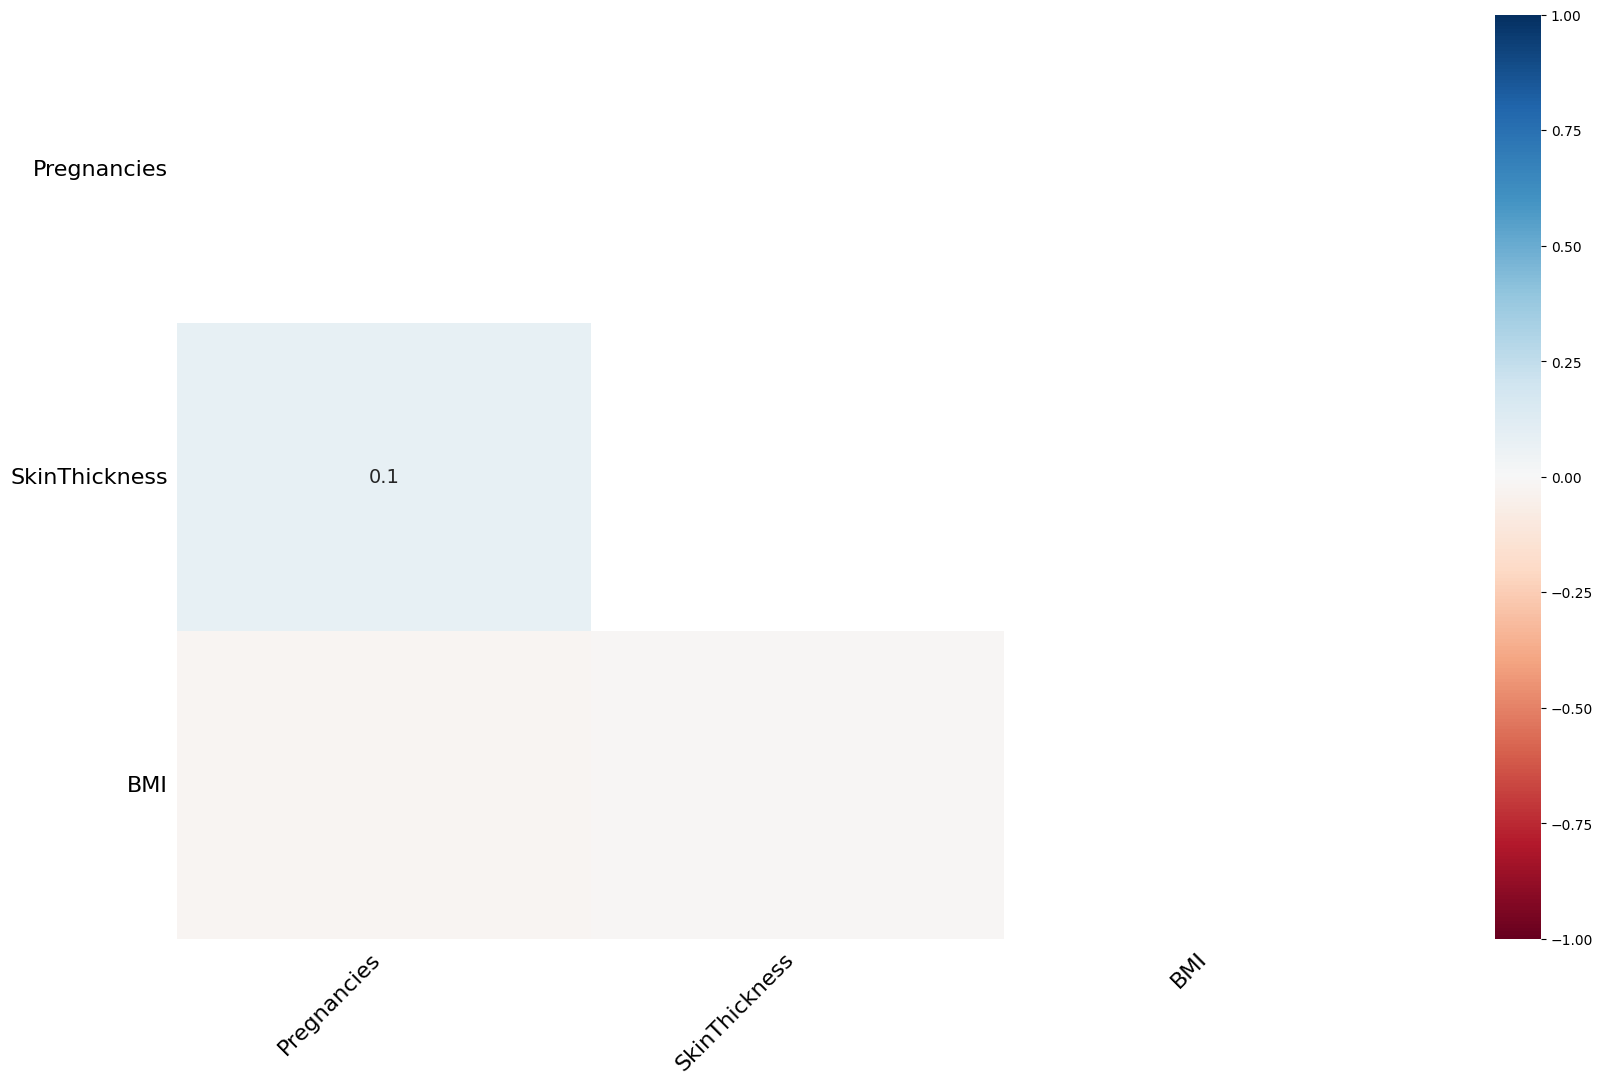

In [8]:
msno.heatmap(df)

<Axes: >

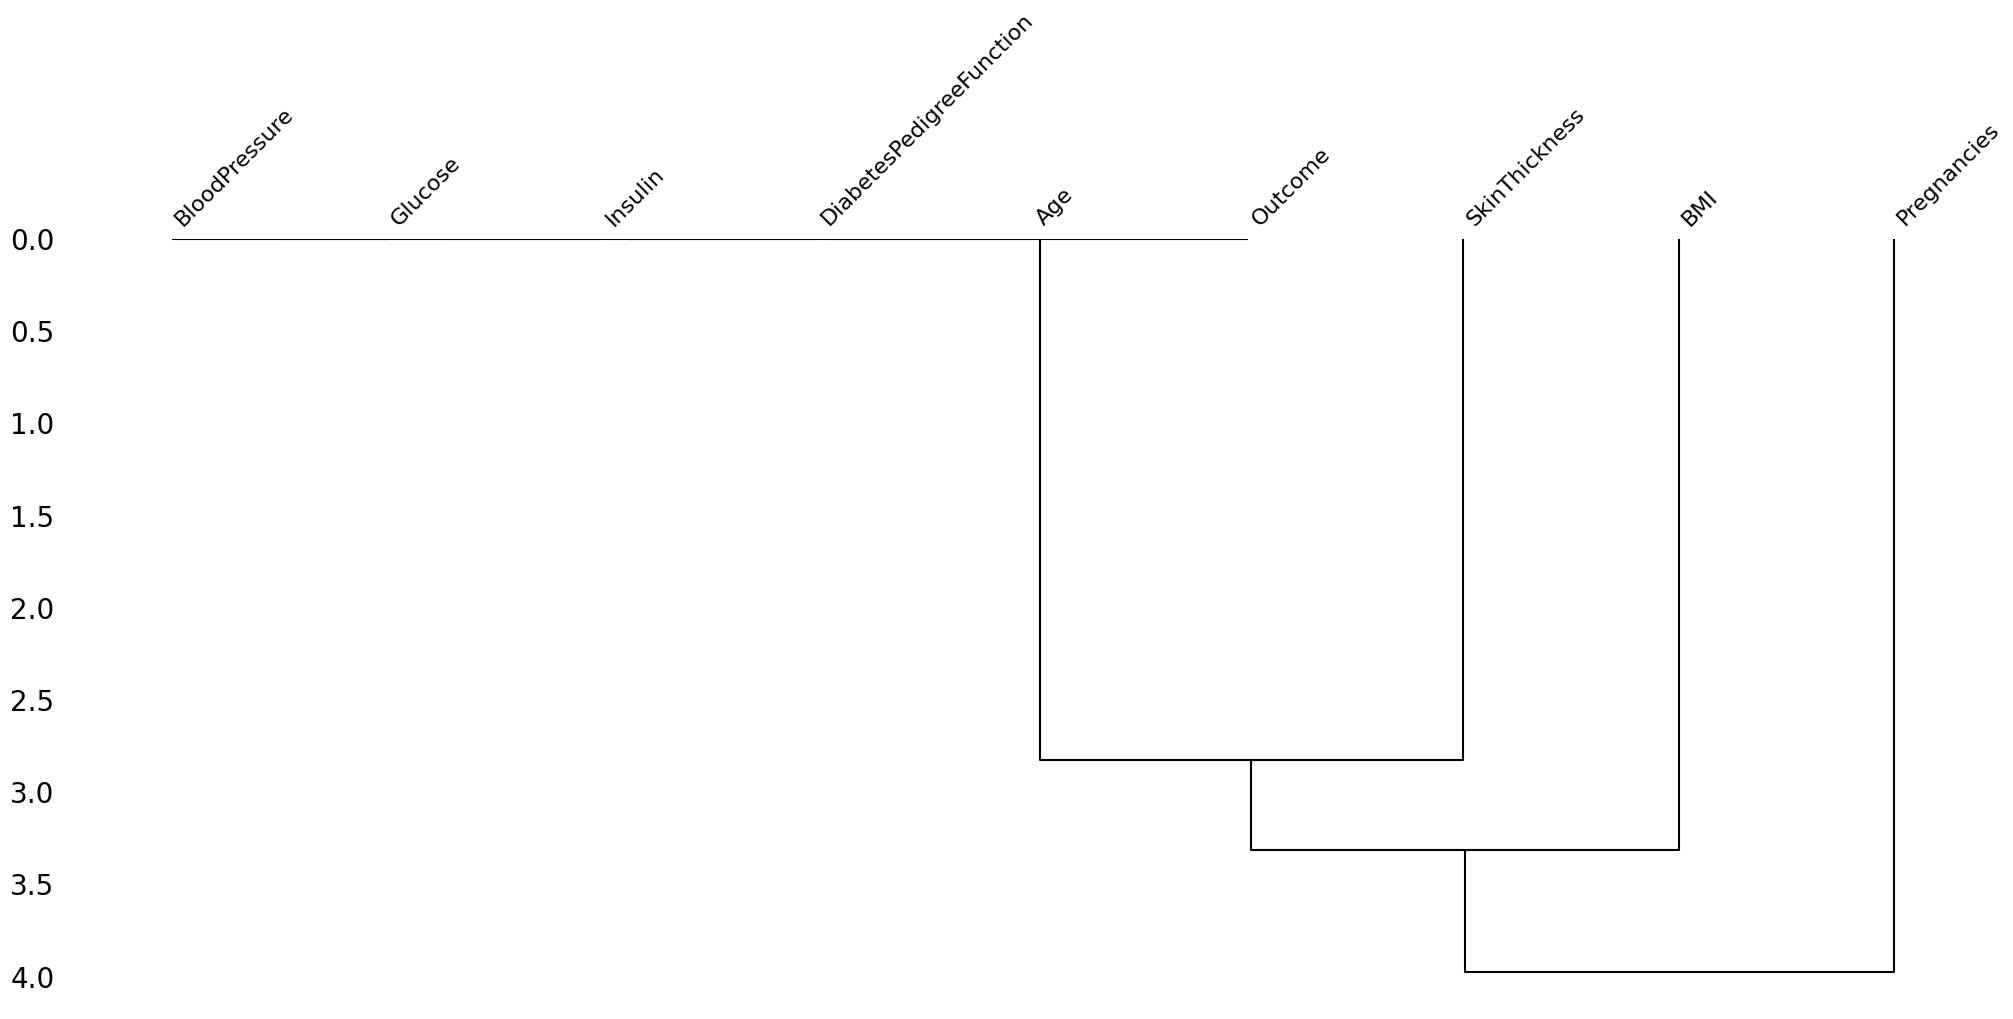

In [9]:
msno.dendrogram(df)

<Axes: >

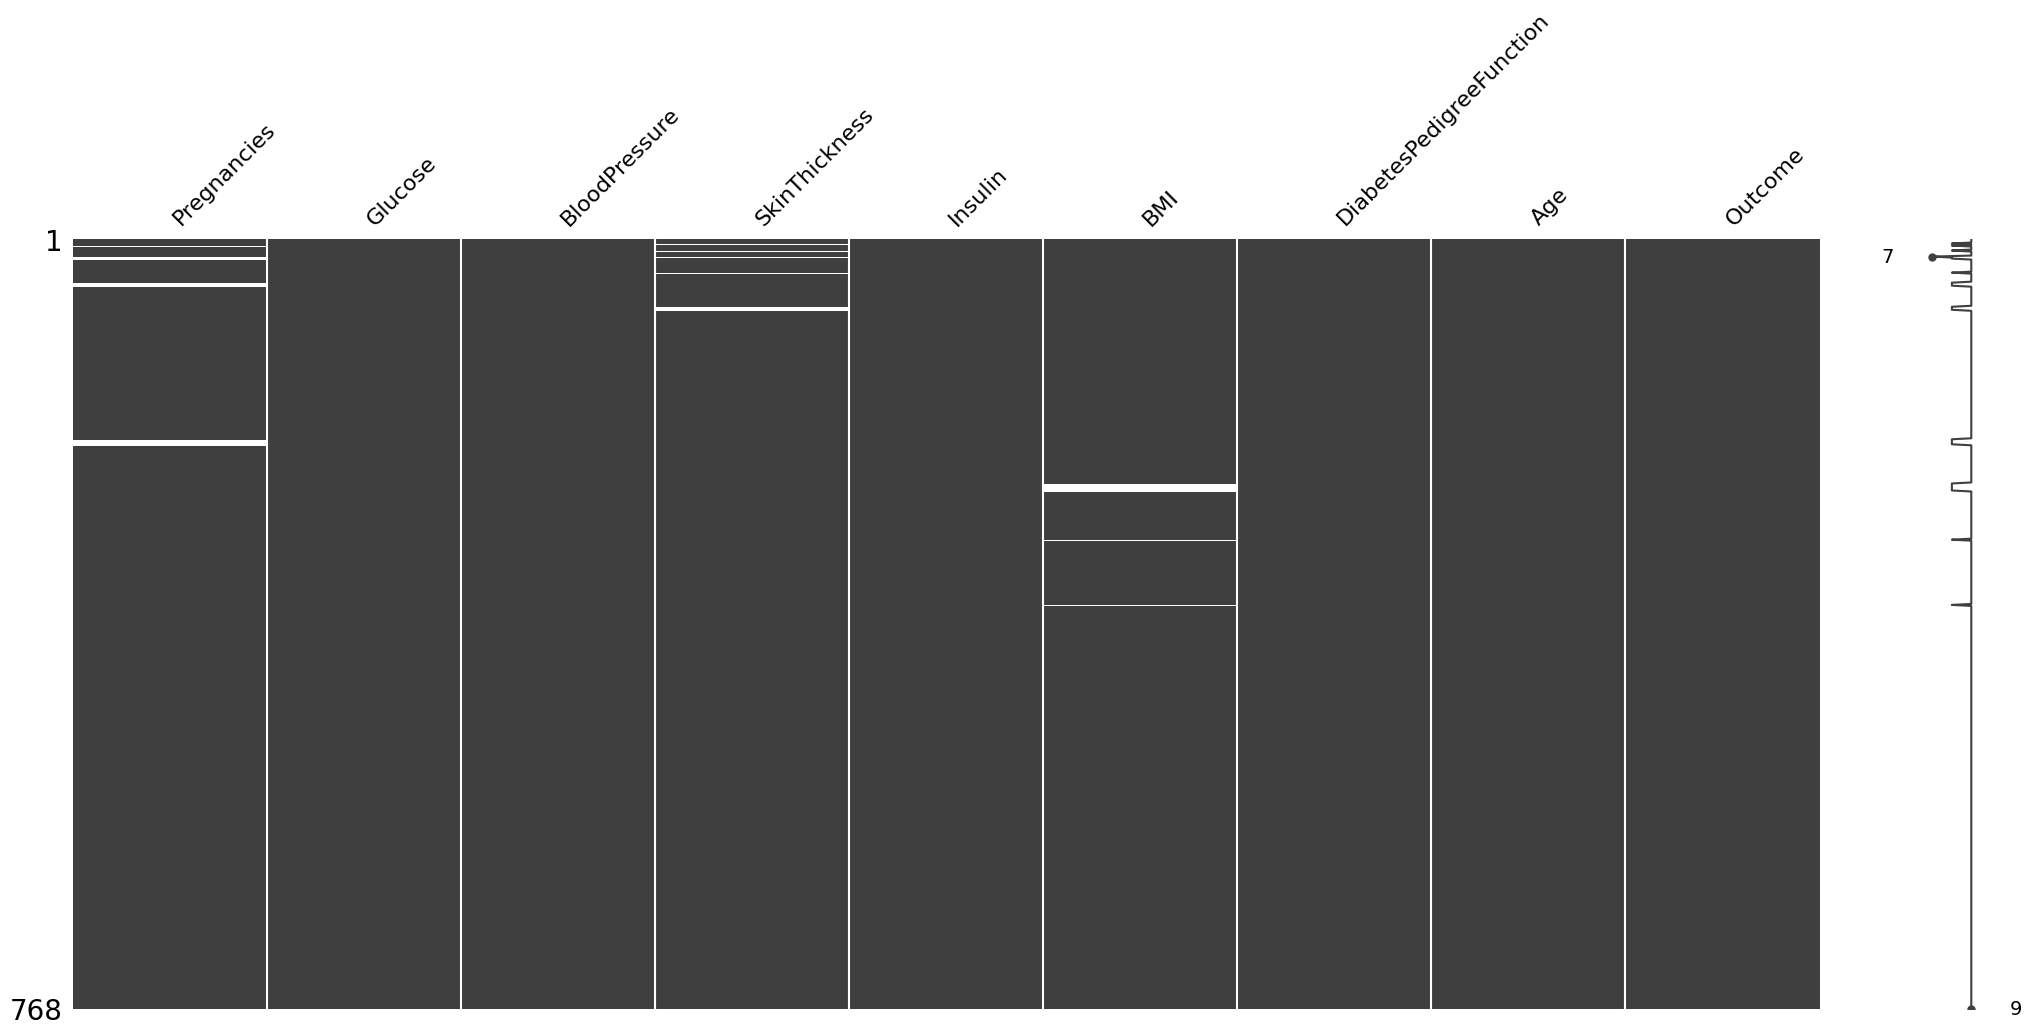

In [10]:
msno.matrix(df)

## <font color = 'Orange'>Handle the missing values</font>

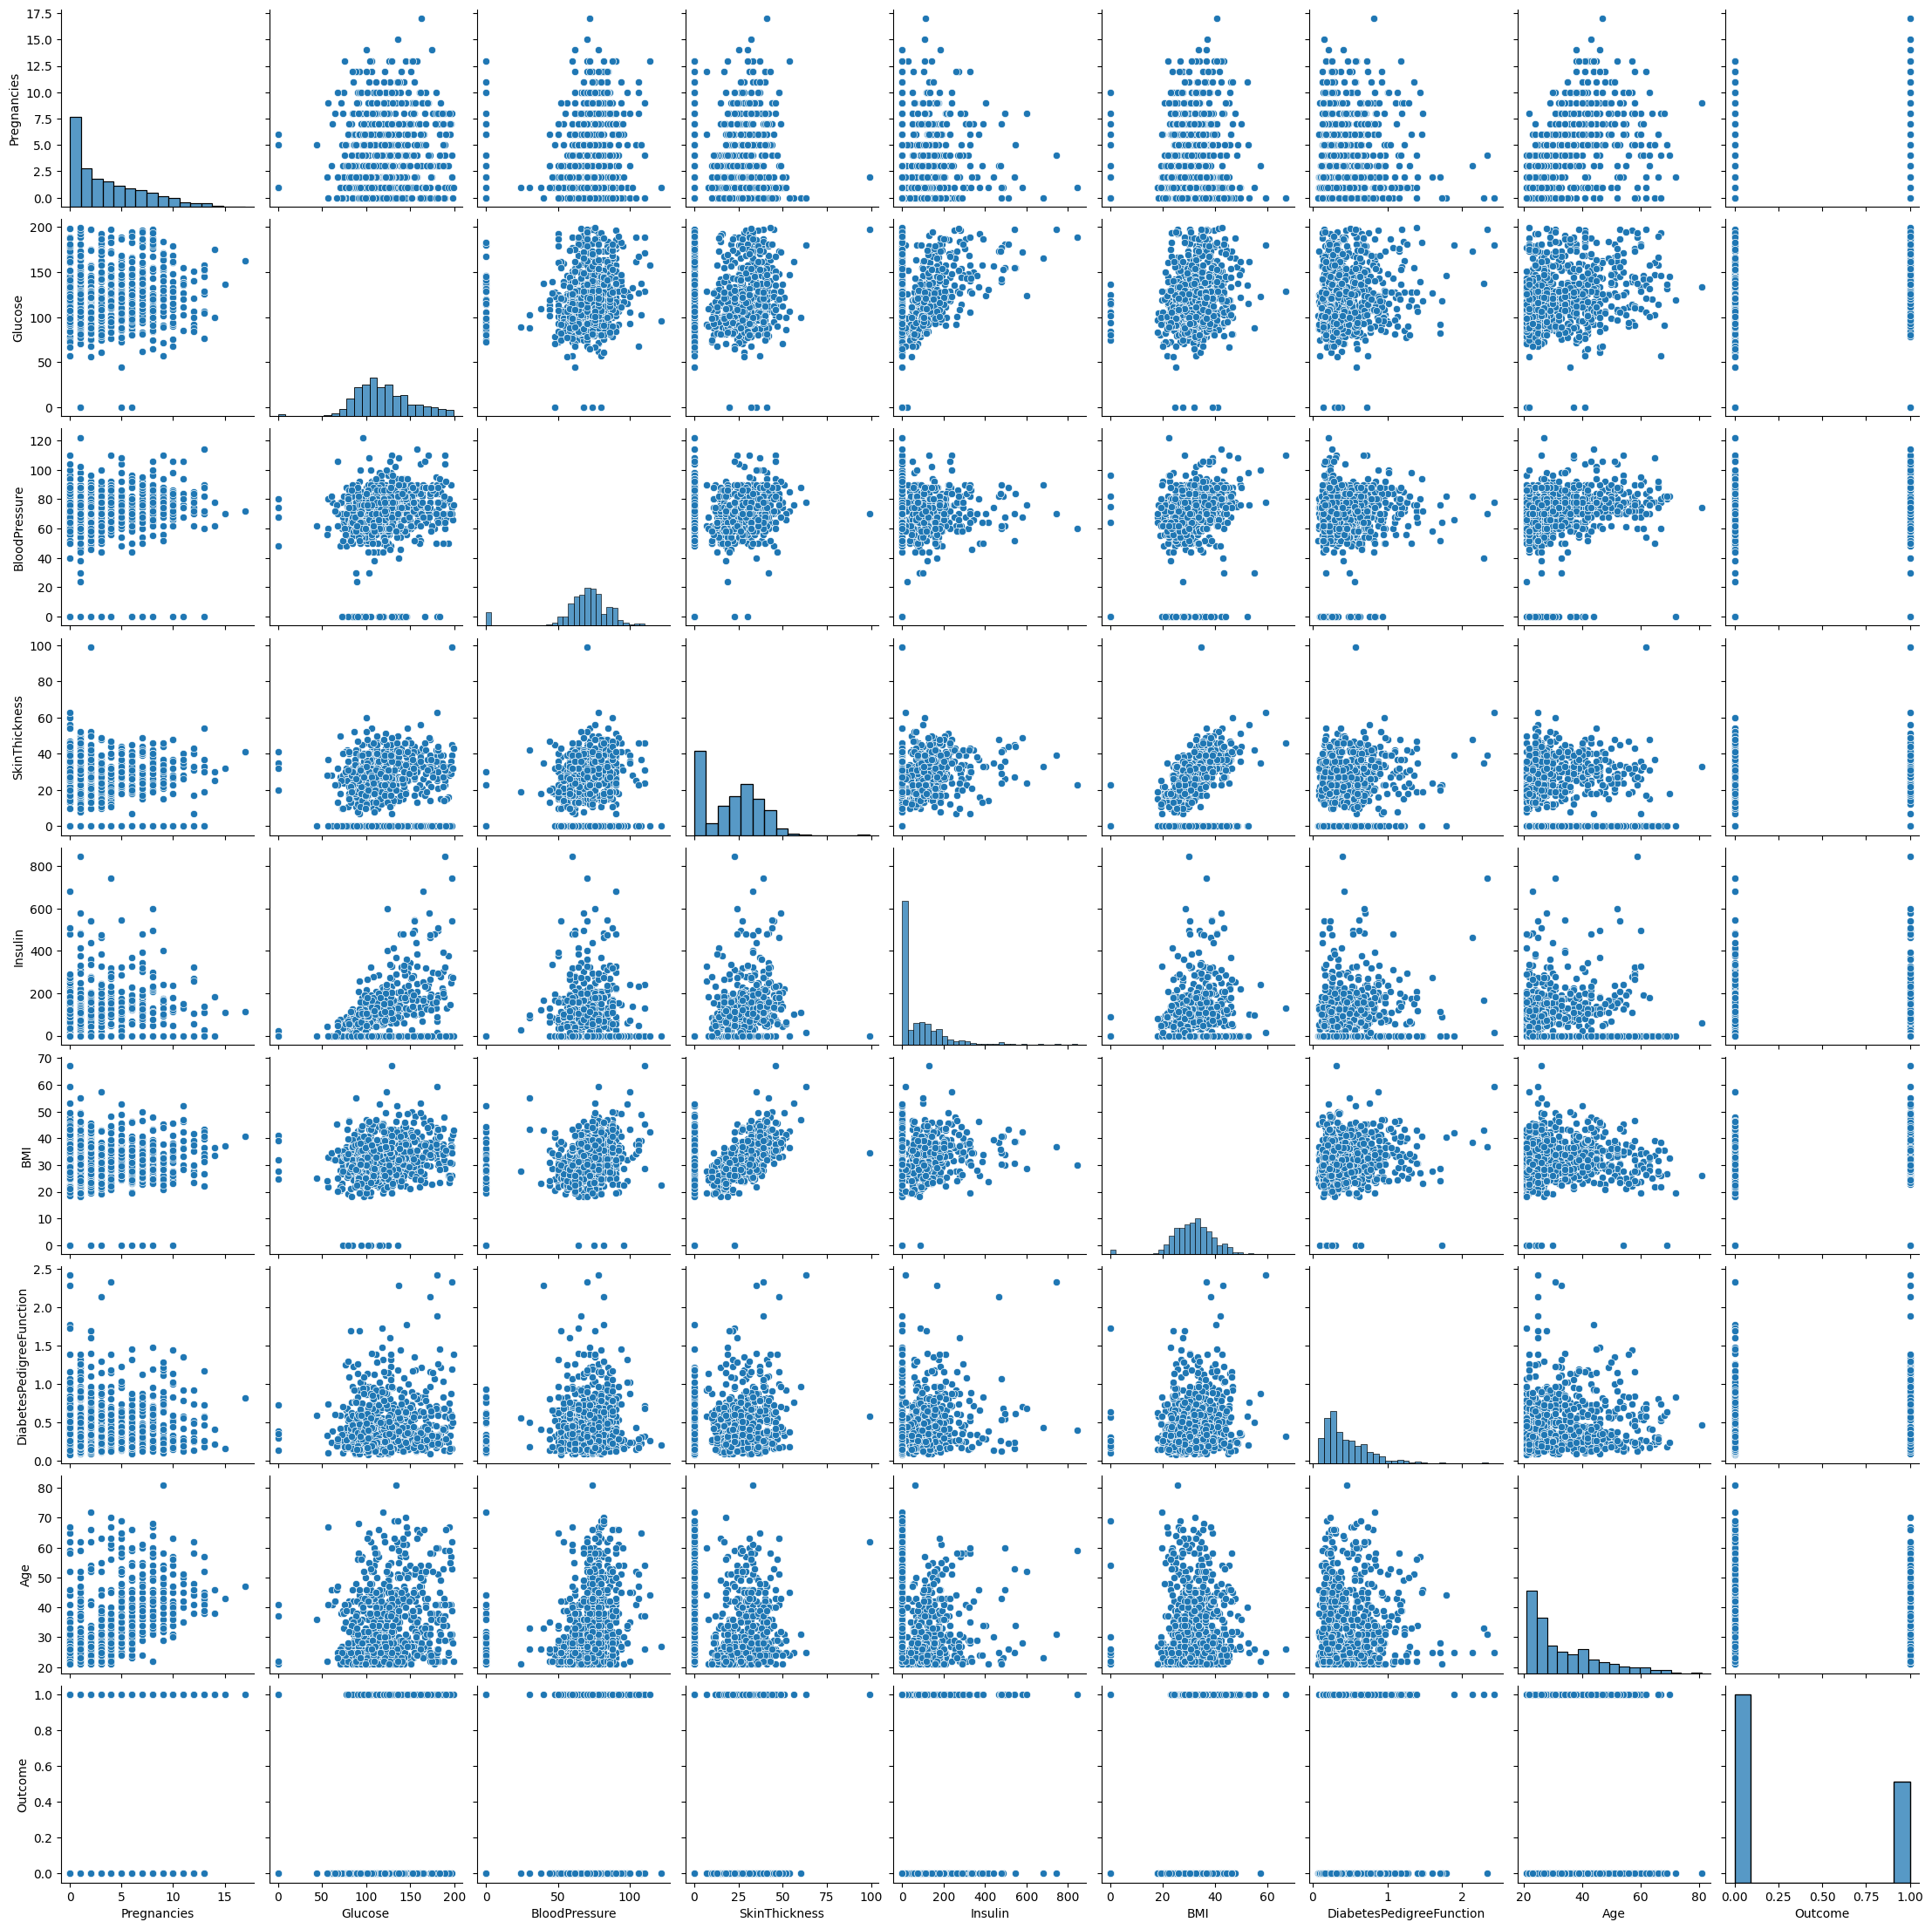

In [11]:
sns.pairplot(df)

<Axes: xlabel='Pregnancies', ylabel='Count'>

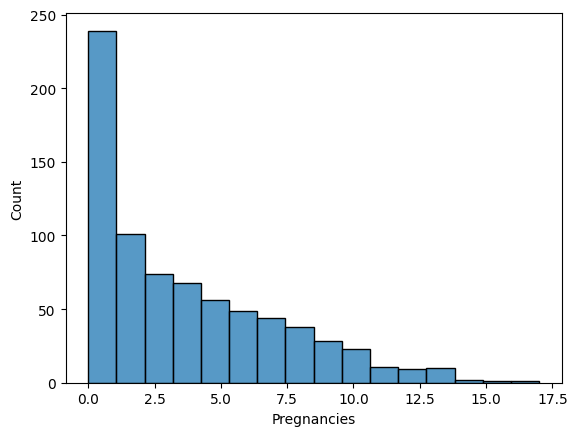

In [12]:
sns.histplot(df['Pregnancies'])

In [13]:
df['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].median())

<Axes: xlabel='Pregnancies', ylabel='Count'>

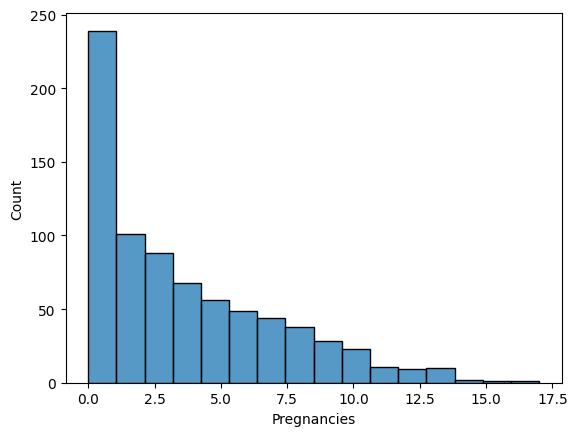

In [14]:
sns.histplot(df['Pregnancies']) # This histogram confirms that filling missing values 
                                # didn't alter the overall distribution

<Axes: xlabel='SkinThickness', ylabel='Count'>

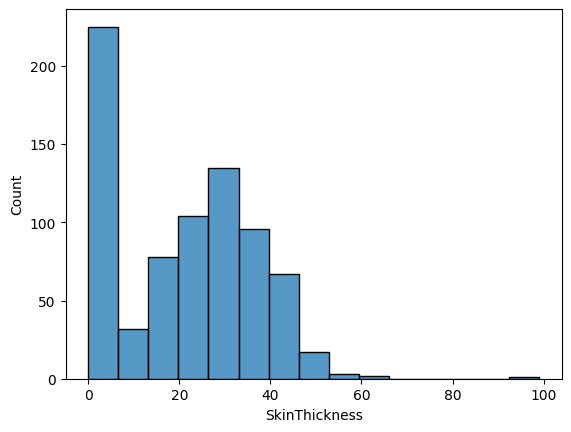

In [15]:
sns.histplot(df['SkinThickness'])

In [16]:
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())

<Axes: xlabel='SkinThickness', ylabel='Count'>

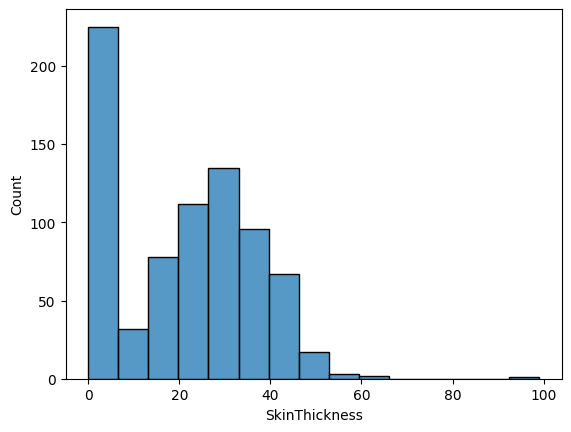

In [17]:
sns.histplot(df['SkinThickness'])

<Axes: xlabel='BMI', ylabel='Count'>

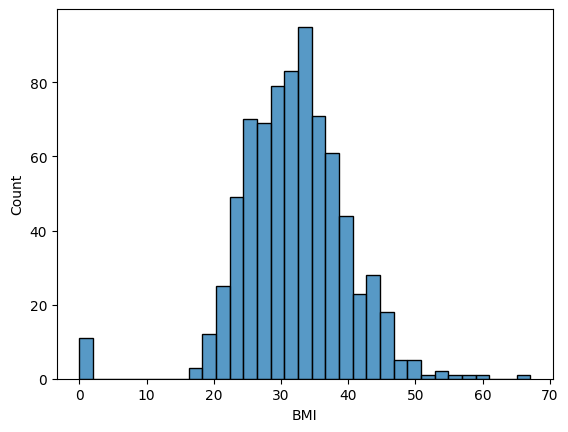

In [18]:
sns.histplot(df['BMI'])

In [19]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

<Axes: xlabel='BMI', ylabel='Count'>

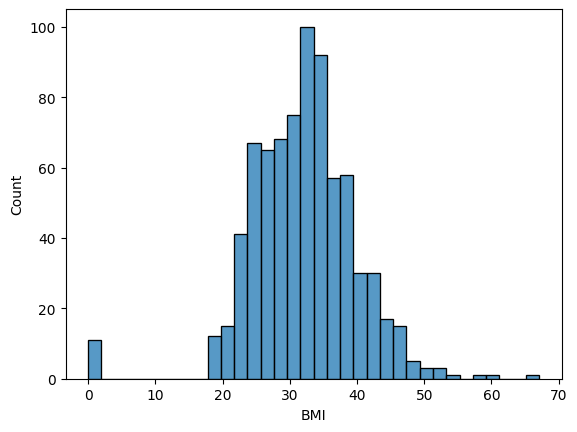

In [20]:
sns.histplot(df['BMI'])

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [22]:
df.to_csv('data/diabetes_new.csv', index=False)

Print the first rows of your final Dataset

In [23]:
dataframe = pd.read_csv('data/diabetes_new.csv')

In [24]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

## <font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [25]:
X, y = dataframe.drop(columns='Outcome'), dataframe['Outcome']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [27]:
model = KNeighborsClassifier(n_neighbors=13, n_jobs=7)

In [28]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=7, n_neighbors=13)

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [29]:
y_pred = model.predict(X_test)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       102
           1       0.69      0.56      0.62        52

    accuracy                           0.77       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.76      0.77      0.76       154



In [31]:
print(confusion_matrix(y_test, y_pred))

[[89 13]
 [23 29]]
